### 一、项目介绍
淘宝网现在是家喻户晓的购物网站，阿里巴巴在2009年推出的“双十一”和在2011年推出的“双十二”，成为了中国乃至全球的一个标志性“购物狂欢节”，每年的11月11日和12月12日，成为了购物者每年的最期待的日子。

淘宝的发展，离不开智能手机的普及，智能手机的快速普及直接促进了移动互联网时代发展。在2011年移动互联网元年，无线淘宝支付宝交易额占比淘宝网比重紧占比的1.77%，到2015年移动端下单量占比达74%，发生了巨大变化。

此项目利用python，分析我们日常最熟悉的淘宝后台数据，了解一个购物网站是怎么运营，应该怎么运营。

#### 提出问题：

1.流量指标：PV（APP总访问量）、UV（APP独立访问数），一天内各个时刻的访客数、近一个月内每天访问量走势、波动情况

2.用户漏斗转化情况如何

3.用户价值情况如何

### 二、数据准备
1.数据集来源：
User Behavior Data on Taobao App 数据集阿里云

数据集包含了2014年11月18日至2014年12月18日之间，淘宝APP移动端用户行为数据。

2.字段描述

user_id 用户ID 

item_id 商品ID

behavior_type 行为类别

user_geohash 用户地址

item_category 商品类别

time 登录时间

### 三、数据处理
1.数据导入

In [1]:
#导入数据分析需要的包
import pandas as pd
import numpy as np
import datetime
#可视化包
import matplotlib.pyplot as plt
%matplotlib inline
#忽略警告信息
import warnings
warnings.filterwarnings('ignore')
#导入数据集
userDF = pd.read_csv('tianchi_mobile_recommend_train_user.csv')
#查看数据基本情况
userDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


2.数据清洗
（1）选择子集

分析数据时，首先要选择自己需要的字段，然后查看各字段是否有缺失值

In [2]:
#查看缺失值数量
userDF.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [3]:
#查看数据集的行列数
userDF.shape

(12256906, 6)

通过查看缺失值，发现user_geohash值大量缺失，这里做删除处理

In [4]:
#删除数据框的某一列
userDF.drop('user_geohash',axis=1,inplace=True)
#查看数据集
userDF.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


从表中看出，原表user_geohash字段已删除

（2）字段重命名

本数据集这里不需要做重命名，忽略。

（3）修改数据类型

In [5]:
#修改数据类型
userDF['user_id']=userDF['user_id'].astype('object')
userDF['item_id']=userDF['item_id'].astype('object')
userDF['behavior_type']=userDF['behavior_type'].astype('object')
userDF['item_category']=userDF['item_category'].astype('object')
#查看数据基本情况
userDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   item_category  object
 4   time           object
dtypes: object(5)
memory usage: 467.6+ MB


(4)删除重复行

In [6]:
userDF.drop_duplicates(subset=['user_id','item_id','behavior_type','item_category','time'],keep='first')

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21
...,...,...,...,...,...
12256885,91530370,384717078,2,7876,2014-12-02 23
12256886,91530370,293543750,3,552,2014-12-04 23
12256900,91530370,101985395,3,12090,2014-12-12 21
12256903,93812622,234391443,1,8765,2014-12-11 16


删除后，剩余6213379行

（5）数据表优化

在表中新增日期和小时字段，分别命名“date”、“hour”

先将“time”转换为datetime数据类型的时间序列


In [7]:
userDF['time']=pd.to_datetime(userDF.time)

In [8]:
#查看转化后的数据类型
userDF.dtypes

user_id                  object
item_id                  object
behavior_type            object
item_category            object
time             datetime64[ns]
dtype: object

新增date,hour字段

In [9]:
userDF['date'] = userDF.time.astype('datetime64[D]')
userDF['hour'] = userDF.time.apply(lambda x: x.hour)
#查看表
userDF.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014-12-16,21


### 四、数据分析
1.流量指标分析

（1）查看PV

In [10]:
#行为类型数量
behavior_type_num=userDF.groupby('behavior_type')['user_id'].count()
behavior_type_num

behavior_type
1    11550581
2      242556
3      343564
4      120205
Name: user_id, dtype: int64

上述4个行为类型设定时已规定：1代表pv（访问），2代表fav（收藏），3代表cart（加购），4代表buy（购买）

由图可知，总访问PV为11550581

（2）查看UV

In [11]:
#查看每列的唯一值
def uniqueValue(data):
    for column in data.columns:
#format 格式化函数
        print('{}的唯一值:'.format(column),len(data[column].unique()))
uniqueValue(userDF)

user_id的唯一值: 10000
item_id的唯一值: 2876947
behavior_type的唯一值: 4
item_category的唯一值: 8916
time的唯一值: 744
date的唯一值: 31
hour的唯一值: 24


由上图可知，总访问UV为10000

（3）图形展示

a.一天内各个时刻的访问量分布

Text(0.5, 1.0, 'uv_hour')

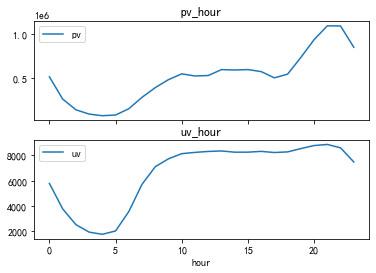

In [12]:
pv_hour=userDF.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=userDF.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')

pv和uv在一天内各时间段走势大体相同，凌晨0-5点都呈下降趋势，随后逐渐上升，在20-23点出现一天中的最高峰。

b.近一月每日访问量分布

Text(0.5, 1.0, 'uv_daily')

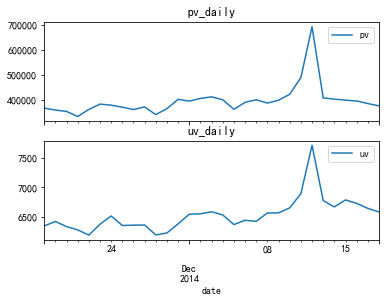

In [13]:
pv_daily=userDF.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily=userDF.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0])
uv_daily.plot(x='date',y='uv',ax=axes[1])
axes[0].set_title('pv_daily')
axes[1].set_title('uv_daily')

从图中看出，12日pv和uv都出现高峰，其他日期无明显波动

2、这里利用AARRR模型，分析用户在“浏览——收藏——加购物车——购买”各个流程环节的转化率

In [14]:
#访问量
pv=behavior_type_num[1]

#收藏量
fav=behavior_type_num[2]

#加购物车数量
cart=behavior_type_num[3]

#购买量
buy=behavior_type_num[4]

#因为收藏和加购没有先后顺序，所以二者合并后计算转化率——收藏加购转化率

#收藏加购转化率

fav_cart_sum=fav+cart
fav_cart_ratio=fav_cart_sum/pv*100

#购买转化率
buy_ratio=buy/fav_cart_sum*100

(1)收藏加购转化率为：

In [15]:
fav_cart_ratio

5.074376778103197

(2)加购转化率为：

In [16]:
buy_ratio

20.508598921722516

(3)绘制漏洞图：

In [25]:
from pyecharts.charts import Funnel
from pyecharts import options as opts

# 用户数据
cate = ['浏览','收藏+加购','购买']
data = [11550581,586120,120205]

funnel = (Funnel()
          .add("用户数",[list(z) for z in zip(cate, data)], 
               sort_='descending',
               label_opts=opts.LabelOpts(position="inside"))
          .set_global_opts(title_opts=opts.TitleOpts(title="漏斗图", subtitle="淘宝用户"))
           )
          
funnel.load_javascript()    


In [27]:
#Pyecharts 在 Jupyter Lab 中生成 HTML，能夠讓使用者直接與圖表進行互動，也因此對於閱讀上更為直覺與方便。然而，在使用前必須進行下列的設置（僅限 Jupyter Lab）：
# 調用 CurrentConfig 來調整 Jupyter 的顯示設定
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [28]:
funnel.render_notebook()

从漏斗图中看出，从浏览到收藏+加购，收窄非常明显，再到购买整体转化率非常低

3、利用RFM模型对用户进行分层分析

由于本数据集中并不涉及金额，所以本次分析仅采用R（最近购买时间）和F（购买频率）进行分析

In [18]:
from datetime import datetime
datenow=datetime(2014,12,20)
#每位用户最近购买时间
recent_buy_time=userDF[userDF.behavior_type==4].groupby('user_id').date.apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1]).reset_index().rename(columns={'date':'recent'})
recent_buy_time.recent=recent_buy_time.recent.map(lambda x:x.days)
#每个用户消费频率
buy_freq=userDF[userDF.behavior_type==4].groupby('user_id').date.count().reset_index().rename(columns={'date':'freq'})
rfm=pd.merge(recent_buy_time,buy_freq,left_on='user_id',right_on='user_id',how='outer')
#将各维度分成两个程度,分数越高越好
rfm['recent_value']=pd.qcut(rfm.recent,2,labels=['2','1'])
rfm['freq_value']=pd.qcut(rfm.freq,2,labels=['1','2'])
rfm['rfm']=rfm['recent_value'].str.cat(rfm['freq_value'])
rfm.head()

,user_id,recent,freq,recent_value,freq_value,rfm
0,4913,4,6,2,1,21
1,6118,3,1,2,1,21
2,7528,7,6,1,1,11
3,7591,7,21,1,2,12
4,12645,6,8,2,1,21


分布对rfm各值进行计数统计

In [19]:
rfm['rfm'].value_counts()['22']

3179

In [20]:
rfm['rfm'].value_counts()['21']

1721

In [21]:
rfm['rfm'].value_counts()['12']

1219

In [22]:
rfm['rfm'].value_counts()['11']

2767

由结果可知，22用户有3179，占比最高，忠诚度和购买频率都是最高，其次是11用户有2767，仅次于22用户，但此用户是高危易流失人群。

五、总结

1.通过流量指标分析及建议

2014年11月18日至2014年12月18日，12256905条数据中，总pv为11550581，总uv为10000。用户访问的每日高峰期为19点-23点之间，属于一天中相对时间最自由放松的时间段，用户点击浏览相对其他时间段较高，可以在此时间段集中推荐用户感兴趣商品，来提升转化率；同时在其他时间段，可以设置整点抢购等促销手段，来提升整天活跃度。日常访问数无明显的异常波动，因为“双十二购物狂欢节”促销活动，12月12日出现明显波动，pv当天接近7万，uv当天接近8千，属于这段时间的最高峰。

2.通过AARRR模型分析及建议

从浏览到收藏加购转化率为5.07%，从收藏加购到购买的转化率为20.5%，最后真正购买的转化率仅为1.03%，购买转化率很低。首先应该加强各环节的运营，“千人千面”个性化展示，推送客户敢兴趣的商品，结合节日、事件等，采取各种营销活动，有效触达客户，来提高转化率。同时，应该扩大用户基数，提高用户覆盖率，对比拼多多的商业模式：“农村包围城市”，应该加快市场下沉速度，抢占人口基数庞大的三四线城市和农村。

3.通过RFM模型对用户分层分析及建议

此时间切片内，22用户占比最高，也是最优质客户，购买频次和购买力都比较出众；对于21这类忠诚度高而购买能力不足的，需要通过各种促销活动来增加用户的购买频率；11和12用户的忠诚度不高，但12用户相对11用户购买力较强，需要关注他们的购物习性做精准化营销；11用户为高危易流失人群，可采用外围引流，优化推荐算法，利用时下热门自媒体渠道，如：抖音，快手，微信公众号、微博等，结合用户推荐，提升用户留存度，同时，挖掘潜在用户。